## Operaciones para datos gravimétricos

Con esta notebook se pueden realizar algunas de las operaciones para separar anomalías de gravedad y poder realizar su análisis. 

Los datos fueron tomados del tutorial [Mapping and validating lineaments]( https://github.com/seg/tutorials-2015/blob/master/1508_Mapping_and_validating_lineaments/1508_Mapping_and_validating_lineaments.ipynb)

El primer paso es cargar todas las librerías necesarias. Se hace uso de algunas de las funciones de la librería  [fatiando a terra](https://www.fatiando.org/). Por otro lado en Utils.py hay funciones para graficar hasta 3 imágenes. En el script dentro de cada función hay mas información sobre lo que se puede hacer para mejorar el análisis y presentación. 

In [1]:
import utils as ut # para graficos y demas...
import numpy as np
import analisis_anom as tr # fatiando a terra
import scipy as sp
from pylab import imread, imshow, gray, mean
from skimage import filters
                                                         
# para acomdar los graficos en la notebook desde el script que lo llamo
%matplotlib inline 

Se cargan los datos. Estos siguieron un flujo de trabajo clásico para anomalías de Bouguer y se removió la tendencia regional (bouguer residual). También se cargan las coordenadas x e y de la grilla 

In [2]:
data = np.loadtxt('continued.txt')
xc = np.loadtxt('xc.txt')
yc = np.loadtxt('yc.txt')

Visualizamos el dato

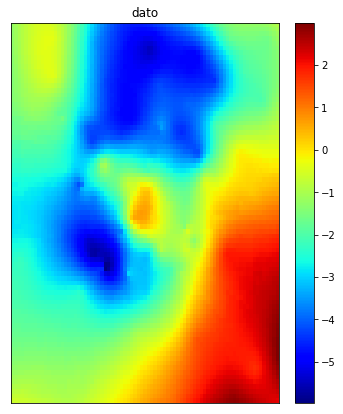

nice plot!


In [3]:
ut.plot_1x1(data,graf=1,mapa_colo='jet')# ver que hay opciones para los gráficos

El siguiente bloque es necesario para poder utilizar las funciones de Fatiando a terra

In [4]:
gauss = sp.ndimage.filters.gaussian_filter(data,1.) # optativo: aplica un filtro de suavizado al dato

d = gauss.ravel() # arregla el dato, X e Y pasando de algo 2D a 1D.

y = xc.ravel() # x, y se cambian porque X en la librería esta en dirección North-South. 
x = yc.ravel() # 


### Derivada vertical

Para obtener la primer derivada en Z sencillamente se llama a la función derivz(). Observar que se puede cambiar el orden del operador derivada. De esta forma:

* order=1: primer derivada
* order=2: segunda derivada

In [5]:
orden = 1
zderiv = tr.derivz(x, y, d, data.shape,orden)# primer derivada de la vertical (o Z)

zderiv2D = np.reshape(zderiv, (81, 81)) # arreglamos el dato obtenido llevandolo a la grilla 2D 

dz = zderiv2D # por conveniencia... :p
np.savetxt('der_ver'+str(orden)+'.txt',dz) # guardamos el dato derivado

Graficamos el dato y su primer derivada vertical

nice plot!


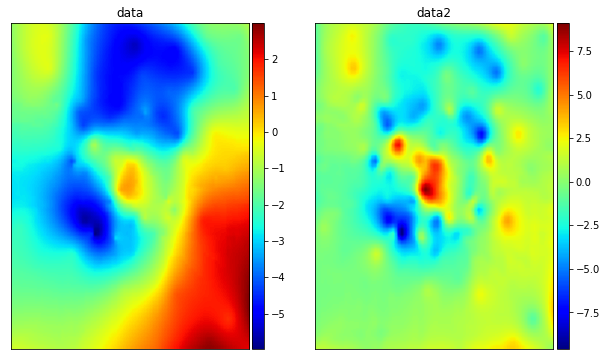

In [6]:
ut.plot_1x2(data,dz,graf=1,n_plot='1er derivada',mapa_colo='jet') # observar que hay mas opciones para estos graficos. Mirar script!

### Continuación analítica

También se puede calcular la continuación analítica ascendente del campo de gravedad. Para esto primero se debe de elegir la altura a la que se quiere extender el campo.

In [7]:
delta_z = 0.1 # ojo con las unidades (SI)
alt = tr.upcontinue(x, y, d, data.shape,delta_z)
alt2D = np.reshape(alt, (81, 81))
np.savetxt('cont_anali'+str(delta_z)+'.txt',alt2D) # guardamos la continuacion ascendente

Graficamos y también se compara con la primer derivada. 

nice plot!


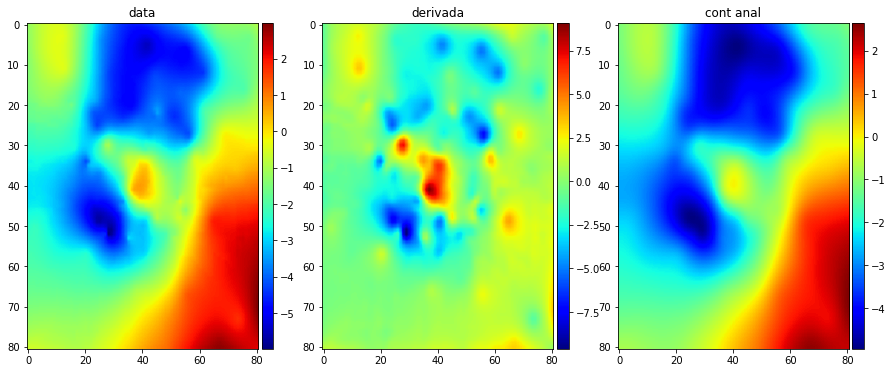

In [8]:
ut.plot_1x3(data,dz,alt2D,name2='derivada',name3='cont anal',graf=1,
            n_plot='cont analitica',mapa_colo='jet') # observar que hay mas opciones para estos graficos. Mirar script!

Ya que estamos se puede calcular la continuidad ascendente para distintas alturas. Para esto agregamos las alturas de interés en la lista alturas:

In [9]:
alturas = [0.1,0.5,1] # Lista alturas: elegir las alturas
for delta_z in alturas:
    
    alt = tr.upcontinue(x, y, d, data.shape,delta_z)
    alt2D = np.reshape(alt, (81, 81))
    np.savetxt('cont_analitica'+str(delta_z)+'.txt',alt2D) # guardamos los archivos

### Gradiente de anomalías

También es posible calcular los gradientes horizontal y total de campo de anomalías.

nice plot!


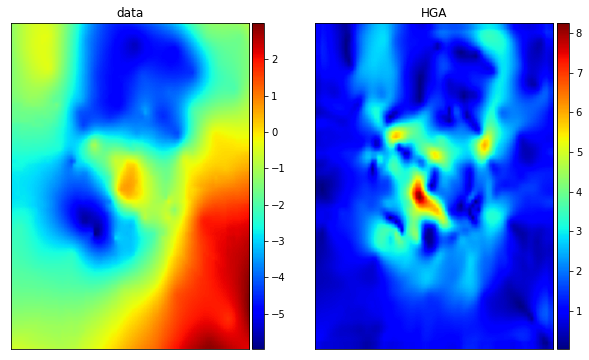

In [16]:
tt = tr.hga(x, y, d, data.shape) # gradiente horizontal
hh2D = np.reshape(tt, (81, 81))
np.savetxt('grad_hor_anom.txt',hh2D)
ut.plot_1x2(data,hh2D,name2='HGA',mapa_colo='jet',graf=1,n_plot='hga')

y la otra opción para el análisis es utilizar el gradiente total de las anomalías

nice plot!


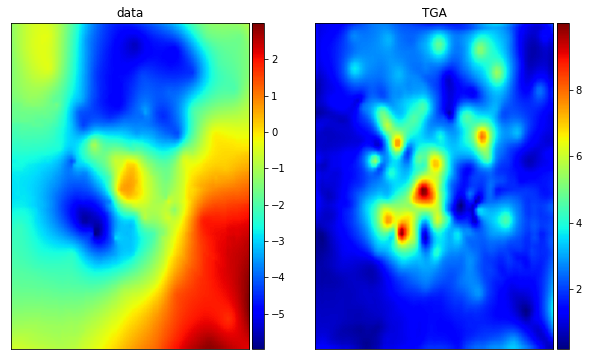

In [14]:
tt = tr.tga(x, y, d, data.shape)
tt2D = np.reshape(tt, (81, 81))
np.savetxt('grad_tot_anom.txt',tt2D)
ut.plot_1x2(data,tt2D,name2='TGA',mapa_colo='jet',graf=1,n_plot='tga')

Podemos graficar los dos gradientes para comparar:

nice plot!


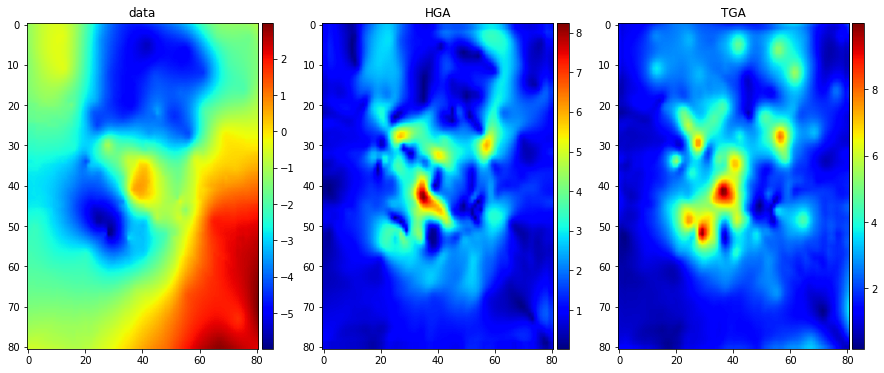

In [17]:
ut.plot_1x3(data,hh2D,tt2D,name2='HGA',name3='TGA',mapa_colo='jet',graf=0,n_plot='tga')

Esto es todo por AHORA...